In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import numpy as np

augmented Images:


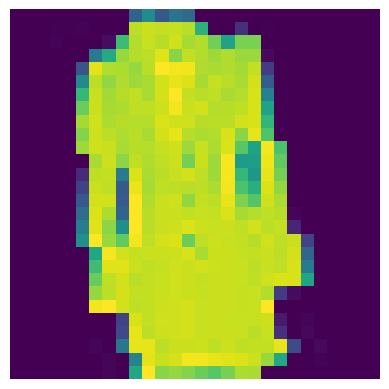

label: Coat
original text image:


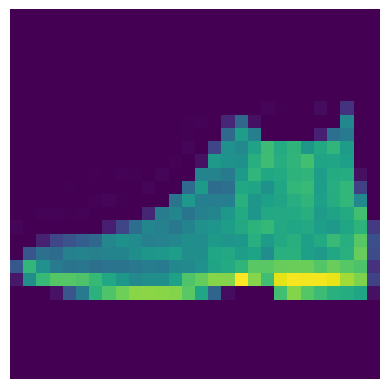

label: Ankle boot


In [13]:
train_transform=transform.Compose([
    transform.RandomHorizontalFlip(p=0.5),
    transform.RandomRotation(degrees=15),
    transform.ToTensor(),
    transform.Normalize((0.5),(0.5))
])
test_transform=transform.Compose([
    transform.ToTensor(),
    transform.Normalize((0.5),(0.5))
])
trainset=torchvision.datasets.FashionMNIST(
    root="./data",
    train=True,
    download=True,
    transform=train_transform
)
trainloader=torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)
testset=torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=test_transform


)
testloader=torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

classes=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def imshow(img):
  img=img/2 +0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.axis('off')
  plt.show()

dataiter=iter(trainloader)
images,labels=next(dataiter)
print('augmented Images:')
imshow(images[0])
print('label:', classes[labels[0]])
test_dataiter=iter(testloader)
test_images, test_labels=next(test_dataiter)
print('original text image:')
imshow(test_images[0])
print('label:',classes[test_labels[0]])


Batch of Augmented Images: 


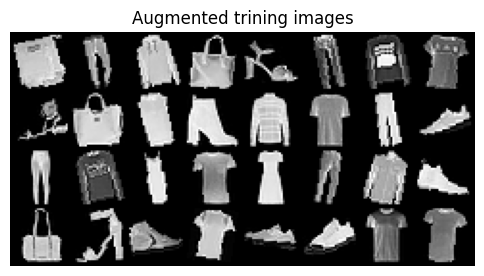

labels: Bag Trouser Pullover Bag Sandal Trouser Pullover T-shirt/top Sandal Bag Pullover Ankle boot Shirt T-shirt/top Trouser Sneaker Trouser Pullover Dress T-shirt/top Dress Trouser Shirt Ankle boot Bag Sandal Sneaker T-shirt/top Sneaker Sneaker T-shirt/top T-shirt/top
Batch of original test images:


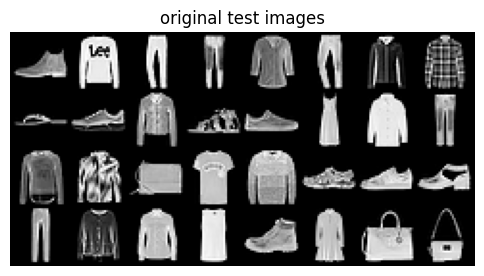

labels: Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt Sandal Sneaker Coat Sandal Sneaker Dress Coat Trouser Pullover Coat Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser Coat Shirt T-shirt/top Ankle boot Dress Bag Bag


In [6]:
#3
#Visualizing Augmented Images
def imshow_batch(img_batch, labels_batch,title):
    img_batch=img_batch/2 +0.5
    npimg=torchvision.utils.make_grid(img_batch,nrow=8)
    npimg=npimg.numpy()
    plt.figure(figsize=(6,6))
    plt.imshow(np.transpose(npimg,(1,2,0)).squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()
    print('labels:',' '.join(f'{classes[labels_batch[j]]}' for j in range(len(labels_batch))))
print('Batch of Augmented Images: ')
imshow_batch(images[:32],labels[:32],'Augmented trining images')
print('Batch of original test images:')
imshow_batch(test_images[:32],test_labels[:32],'original test images')





In [7]:
# Defining nural network
class NetWithDropout(nn.Module):
  def __init__(self):
    super(NetWithDropout,self).__init__()
    self.fc1=nn.Linear(28*28,256)
    self.dropout1=nn.Dropout(0.5)
    self.relu1=nn.ReLU()
    self.fc2=nn.Linear(256,128)
    self.dropout2=nn.Dropout(0.5)
    self.relu2=nn.ReLU()
    self.fc3=nn.Linear(128,64)
    self.dropout3=nn.Dropout(0.5)
    self.relu3=nn.ReLU()
    self.fc4=nn.Linear(64,10)
  def forward(self,x):
    x=x.view(-1,28*28)
    x=self.dropout1(self.relu1(self.fc1(x)))
    x=self.dropout2(self.relu2(self.fc2(x)))
    x=self.dropout3(self.relu3(self.fc3(x)))
    x=self.fc4(x)
    return x
net=NetWithDropout()


In [8]:
#5 Choosing Loss Function and Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001,weight_decay=0.001)

In [9]:
num_epochs=10
train_losses=[]
val_losses=[]
best_val_loss=float('inf')
patience=3
trigger_times=0


In [11]:
for epoch in range(num_epochs):
    net.train()
    running_train_loss=0.0
    for inputs, labels in trainloader:
      optimizer.zero_grad()
      outputs=net(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      running_train_loss+=loss.item()
    train_loss=running_train_loss/len(trainloader)
    train_losses.append(train_loss)
    net.eval()
    running_val_loss=0.0
    with torch.no_grad():
      for inputs,labels in testloader:
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        running_val_loss += loss.item()
    val_loss=running_val_loss/len(testloader)
    val_losses.append(val_loss)
    print(f'epoch [{epoch +1}/{num_epochs}], training Loss:{train_loss:.4f},validation Loss:{val_loss:.4f}')
    if val_loss<best_val_loss:
      best_val_loss=val_loss
      trigger_times=0
      torch.save(net.state_dict(),'best_model.pth')
    else:
      trigger_times +=1
      if trigger_times>=patience:
        print('early stopping!')
        break

epoch [1/10], training Loss:0.6631,validation Loss:0.5069
epoch [2/10], training Loss:0.6623,validation Loss:0.5179
epoch [3/10], training Loss:0.6576,validation Loss:0.5248
early stopping!


In [14]:
net.load_state_dict(torch.load('best_model.pth'))


<ipython-input-14-ab80347da497>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('best_model.pth'))


<All keys matched successfully>

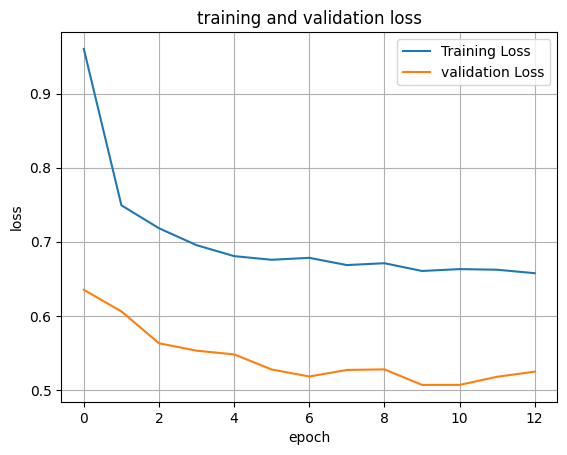

In [15]:
plt.figure()
plt.plot(train_losses,label='Training Loss')
plt.plot(val_losses,label="validation Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training and validation loss')
plt.legend()
plt.grid(True)
plt.show()

In [16]:

# 10. Evaluating the Final Model

def evaluate_network():
    net.eval()
    correct = 0
    total = 0
    class_correct = [0] * 10
    class_total = [0] * 10
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            # Per-class accuracy
            c = (predicted == labels).squeeze()
            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    print(f'Overall Accuracy on the test set: {100 * correct / total:.2f}%\n')
    # Print accuracy for each class
    for i in range(10):
        if class_total[i] > 0:
            print(f'Accuracy of {classes[i]:>10s}: {100 * class_correct[i] / class_total[i]:.2f}%')
        else:
            print(f'Accuracy of {classes[i]:>10s}: N/A (no samples)')

# Call the evaluation function
evaluate_network()

Overall Accuracy on the test set: 81.46%

Accuracy of T-shirt/top: 81.40%
Accuracy of    Trouser: 94.20%
Accuracy of   Pullover: 67.90%
Accuracy of      Dress: 86.70%
Accuracy of       Coat: 80.80%
Accuracy of     Sandal: 86.80%
Accuracy of      Shirt: 41.70%
Accuracy of    Sneaker: 87.00%
Accuracy of        Bag: 93.30%
Accuracy of Ankle boot: 94.80%
